# Description of the dataset and the task
- Data Collection
- Implications on the types of conclusions that could be made from the data
- Description of the variables, observations, and/or structure of the data
- Target task

In [1]:
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [28]:
# Create a list with the filepaths for training and testing
batch_size = 32
img_height = 244
img_width = 244

train_path = Path('dataset/train')
test_path = Path('dataset/test')

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path, 
    validation_split=0.2, 
    subset="training", 
    seed=123, 
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path, 
    seed=123, 
    image_size=(img_height, img_width))

class_names = train_ds.class_names
print(class_names)
print(len(class_names))

Found 2415 files belonging to 22 classes.
Using 1932 files for training.
Found 2415 files belonging to 22 classes.
Using 483 files for validation.
Found 220 files belonging to 22 classes.
['garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
22


In [29]:
from pathlib import Path
import imghdr

data_dir = "dataset/test"
image_extensions = [".png", ".jpg", ".jpeg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png", 'jpg']
for filepath in Path(data_dir).rglob("*/*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [30]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 244, 244, 3)
(32,)


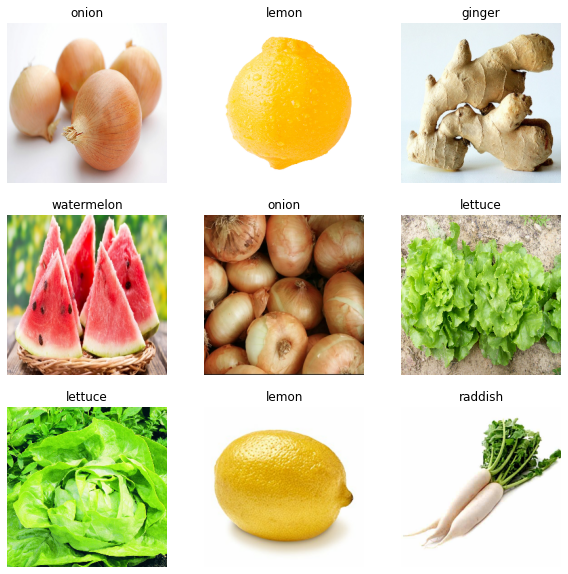

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Exploratory data analysis
- Mean Image
- Distribution of the Size of Images
- Distribution of labels

# Data Pre-processing and Cleaning
- Change into same dimensions

In [47]:
num_classes=22
IMG_SIZE = 244
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [48]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# train_ds = prepare(train_ds, shuffle=True, augment=True)
# val_ds = prepare(val_ds)
# test_ds = prepare(test_ds)

In [49]:
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
61/61 [==============================] - 50s 607ms/step - loss: 3.0183 - accuracy: 0.0968 - val_loss: 2.4382 - val_accuracy: 0.2381
Epoch 2/10
61/61 [==============================] - 36s 585ms/step - loss: 2.2376 - accuracy: 0.2702 - val_loss: 2.0801 - val_accuracy: 0.3354
Epoch 3/10
61/61 [==============================] - 36s 595ms/step - loss: 1.9288 - accuracy: 0.3737 - val_loss: 1.8932 - val_accuracy: 0.3975
Epoch 4/10
61/61 [==============================] - 36s 587ms/step - loss: 1.7569 - accuracy: 0.4260 - val_loss: 1.8220 - val_accuracy: 0.4141
Epoch 5/10
61/61 [==============================] - 34s 558ms/step - loss: 1.6407 - accuracy: 0.4664 - val_loss: 1.7373 - val_accuracy: 0.4265
Epoch 6/10
61/61 [==============================] - 35s 582ms/step - loss: 1.5746 - accuracy: 0.4938 - val_loss: 1.8785 - val_accuracy: 0.4306
Epoch 7/10
61/61 [==============================] - 37s 606ms/step - loss: 1.4557 - accuracy: 0.5186 - val_loss: 1.7346 - val_accuracy: 0.4658

In [52]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 244, 244, 3)       0         
                                                                 
 sequential_11 (Sequential)  (None, 244, 244, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 244, 244, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 122, 122, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 61, 61, 32)       0         
 g2D)                                                

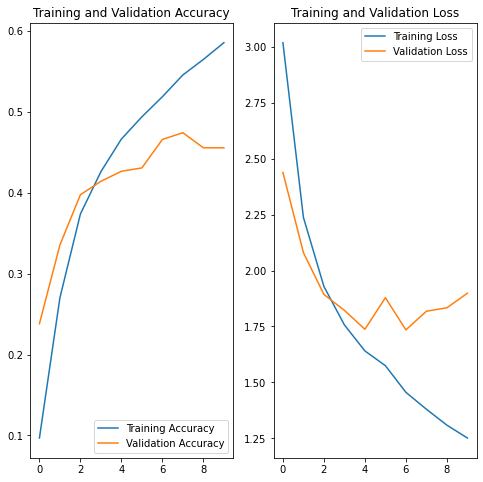

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

7/7 [==============================] - 1s 132ms/step - loss: 1.4810 - accuracy: 0.4864
Accuracy 0.48636364936828613


In [66]:
import os
img = tf.keras.utils.load_img(
    'Image_110.jpg', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 23ms/step
This image most likely belongs to orange with a 53.83 percent confidence.


# Model Training

# Model Selection and Hyperparameter Tuning

# Insights and conclusions